# 第六章 梯度下降法（Gradient Descent）
### 并非机器学习算法，而是优化搜索的方法
#### 如：梯度下降法（最小化损失函数）、梯度上升发（最大化效用函数）

对于二维来说，横轴是参数theta，纵轴是损失函数J的取值，将J对theta的导数（梯度）代表了J增大的方向（本质上是在刻画theta的单位变化带去的J的变动），再加入一个步长eta。对于高维，则是由多个偏导数构成一个梯度。

<a href="https://www.codecogs.com/eqnedit.php?latex=-\eta&space;\frac{dJ}{d\theta&space;}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?-\eta&space;\frac{dJ}{d\theta&space;}" title="-\eta \frac{dJ}{d\theta }" /></a>

其中，eta被称作学习率（Learning rate），是一个超参数，eta的取值会影响获取最优解的速度，并且倘若eta的取值不合适甚至会得不到最优解。当eta太小，收敛的速度太慢；当eta太大，甚至会导致不收敛。

需要注意：不是所有函数都会由唯一极值点，找到局部最优点但不一定是全局最优解。
解决方法：梯度下降的初始点也是超参数，可以多次运行，随机化初始点。

#### 以下主要以在线性回归中最小化损失函数为例
线性回归最小化损失函数具有唯一解


## 梯度下降法模拟

In [2]:
import numpy as np
import matplotlib.pyplot as plt

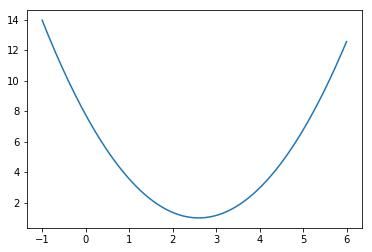

In [4]:
# 此处x为参数theta，y为目标函数J
plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.6)**2 + 1
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# 重要的步骤：对于J函数求导
def dJ(theta):
    return 2*(theta-2.6)

# 求出当前的目标函数值位置
def J(theta):
    return (theta - 2.6)**2 + 1

In [8]:
eta = 0.01
theta = 0.0 #设置初始值theta
epsilon = 1e-8  #精度

while True:
    gradient = dJ(theta)  # 在每一轮循环中，要求当前的点对应的梯度是多少（导数）
    last_theta = theta #记录上一次的theta
    theta = theta - eta * gradient # 每一次求出梯度后，朝着目标函数的负方向移一步
    if abs(J(theta) - J(last_theta)) < epsilon:
        break                                 # 判断新的theta是否去到最小的点
        
print(theta)
print(J(theta))
    
    

2.59951464945986
1.0000002355651467


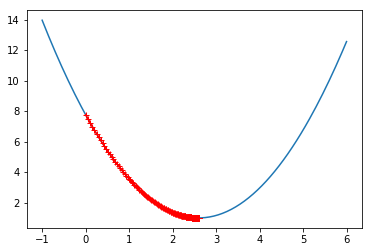

In [14]:
# 可视化来看一下

eta = 0.01 #当eta变小，学习率会变低，每一步都很小
theta = 0.0 #设置初始值theta
epsilon = 1e-8  #精度

theta_history = [theta]

while True:
    gradient = dJ(theta)  # 在每一轮循环中，要求当前的点对应的梯度是多少（导数）
    last_theta = theta #记录上一次的theta
    theta = theta - eta * gradient # 每一次求出梯度后，朝着目标函数的负方向移一步
    theta_history.append(theta)
    
    # 越接近极值梯度会越小，可以通过目标函数的变化值，判断新的theta是否去到最小的点
    if abs(J(theta) - J(last_theta)) < epsilon:
        break                                 
        
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+')
    
    

In [20]:
# 为了更加方便地调用，可以对上述进行封装

def dJ(theta):
    return 2*(theta-2.6)

def J(theta):
    return (theta - 2.6)**2 + 1

def gradient_descent(initial_theta, eta, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if abs(J(theta)-J(last_theta))<epsilon:
            break

def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r')
    plt.show()

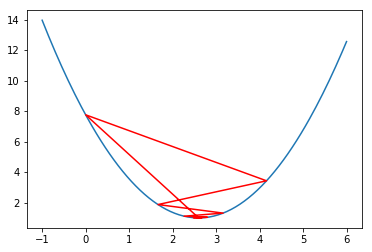

23

In [22]:
# 倘若eta太大，导致theta变化的每一步太大，会出问题

eta = 0.8
theta_history = [theta]
gradient_descent(0.0, eta)
plot_theta_history()
len(theta_history)

In [23]:
eta = 1.2
theta_history = [theta]
gradient_descent(0.0, eta)
plot_theta_history()
len(theta_history)

OverflowError: (34, 'Result too large')

In [24]:
# eta太大导致误解报错，可以使用try-except的方法避免报错

def J(theta):
    try:
        return (theta - 2.6)**2 + 1
    except:
        return float('inf')

#  尽管如此，不报错但是会出现死循环，因为之前是while True

In [28]:
# 为了避免死循环，加入循环次数的控制，加入变量n_iters控制循环的次数

def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if abs(J(theta)-J(last_theta))<epsilon:
            break
            
        i_iter += 1

        
eta = 1.2
theta_history = [theta]
gradient_descent(0.0, eta)
theta_history[-1]   #如下面出现nan情况则表明eta太大了，取值不合适

nan

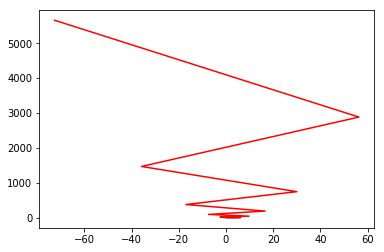

In [34]:
eta = 1.2
theta_history = []
gradient_descent(0.0, eta, n_iters = 10) #限制了theta的变化只能迈出10步
plot_theta_history()

## 多元线性回归的梯度下降

梯度在高维空间中，是一个偏导数组成的向量。因为这个向量中偏导数的大小与样本大小有关（求和），所以目标函数乘以一个1/m来消除这个情况，目标函数变成了MSE，即优化的过程是求出theta向量使得MSE最小。


In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size=100)

In [41]:
x = x.reshape(-1,1)
print(x.shape)
print(y.shape)

(100, 1)
(100,)


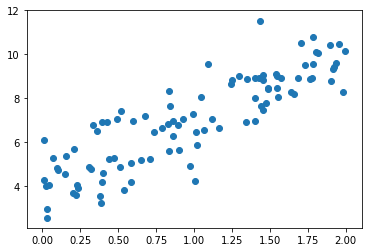

In [42]:
plt.scatter(x,y)
plt.show()

In [44]:
def J(theta, X_b, y):
    try:
        return np.sum(y - X_b.dot(theta)**2) / len(X_b)
    except:
        return float('inf')